In [1]:
import pandas as pd 
dec_data = pd.read_csv("../month_data/22_12.csv", sep='\t')

In [2]:
dec_data.head()

,id,subreddit,parent_id,post_id,date,score,user,text
0,iyfeodo,politics,iydnjyv,z8ozez,20221201,1,Stardustchaser,"I mean, we got plenty of mental institution ho..."
1,iyfeody,wayofthebern,iyddpzk,z8mnfn,20221201,2,LandmassWave,Both will pass the House. Then that darn parli...
2,iyfeohm,politicalcompassmemes,iyf9d3g,z95g29,20221201,-17,wizard680,Crusades? Cringe. Let's form another caliphate...
3,iyfeoie,conspiracy,iyf63ur,z8tnrg,20221201,2,bearlegion,Spite.
4,iyfeoop,askconservatives,iyfd52z,z95ftn,20221201,8,SwollenRaccoon,"Your question was ""who enforces contracts"". Y..."


In [3]:
week_data = pd.read_csv("../annotated/re_annotated_test_data.csv", sep=",")

In [4]:
week_data.head()

,Unnamed: 0.1,Unnamed: 0,Column1,text,Topic,Name,annotated_stance
0,0,110,125192,Because pro life is a ridiculous position that...,0,0_abortion_abortions_fetus_pregnancy,for
1,1,6,75468,"You know, you're actually making some good arg...",0,0_abortion_abortions_fetus_pregnancy,neutral
2,2,64,152667,You’re saying born people have more rights tha...,0,0_abortion_abortions_fetus_pregnancy,against
3,3,55,198206,"No, we aren't. An embryo is not ""a child"". A...",0,0_abortion_abortions_fetus_pregnancy,for
4,4,1,87600,It is part of the mother. Individual entities ...,0,0_abortion_abortions_fetus_pregnancy,for


In [5]:
week_data = week_data.rename(columns={"w": "text"})
week_data = week_data[["text", "annotated_stance"]]
week_data

,text,annotated_stance
0,Because pro life is a ridiculous position that...,for
1,"You know, you're actually making some good arg...",neutral
2,You’re saying born people have more rights tha...,against
3,"No, we aren't. An embryo is not ""a child"". A...",for
4,It is part of the mother. Individual entities ...,for
...,...,...
95,Are you saying a doctor isn't part if an abort...,neutral
96,"Then we agree, I suppose. If I was to think ...",neutral
97,Give the rights back to the states! *Power no...,for
98,idk about you guys but people shouldnt harass ...,for


In [6]:
week_data_full = pd.merge(dec_data, week_data, on=["text"])

In [7]:
week_data_full.head()

,id,subreddit,parent_id,post_id,date,score,user,text,annotated_stance
0,j0shiq8,centrist,j0qwpmo,zp3lej,20221219,2,brutay,Maybe they have a passion for biochemistry an...,against
1,j0skje8,conspiracy,j0rfbsb,zp0y5a,20221219,4,First-Parking-5463,Are you using euphemisms for killing the unbor...,against
2,j0sm5tv,abortiondebate,j0slo9q,zp2c5q,20221219,6,starksoph,You can argue for personhood of a fetus as muc...,for
3,j0sukry,arizonapolitics,j0so7u7,zookb5,20221219,2,shatteredarm1,"Just ask yourself the question, why would some...",for
4,j0sz9tv,neoliberal,j0syyqb,zosh3d,20221219,3,TemporalDiceCatcher,Are summer children supposed to be born or con...,neutral


In [8]:
subreddits = week_data_full['subreddit'].unique()
len(subreddits)

20

In [9]:
subreddit_stances= {}
subreddit_stances["politics"]= "neutral"
subreddit_stances["askconservatives"] = "against"
subreddit_stances["conservative"] = "against"
subreddit_stances["prochoice"] = 'for'
subreddit_stances['prolife'] = 'against'
subreddit_stances['askaliberal'] = 'for'
subreddit_stances['centrist'] = 'neutral' #truly neutral, moderates
subreddit_stances['conspiracy'] = 'neutral'
subreddit_stances['abortiondebate'] = 'neutral'
subreddit_stances['arizonapolitics'] = 'for' #should be neutral if we only look at title, but Arizona is moslty pro-choice
subreddit_stances['neoliberal'] = 'for'
subreddit_stances['mensrights'] = 'neutral'
subreddit_stances['politicalcompassmemes'] = 'neutral'
subreddit_stances['inthenews'] = 'neutral'
subreddit_stances['asktrumpsupporters'] = 'against'
subreddit_stances['changemyview'] = 'neutral'
subreddit_stances['goldandblack'] = 'for'
subreddit_stances['politicaldiscussion'] = 'neutral' 
subreddit_stances['askdemocrats'] = 'for'
subreddit_stances['qult_headquarters'] = 'neutral' #unsure what it is 

In [10]:
subreddit_stances

{'politics': 'neutral',
 'askconservatives': 'against',
 'conservative': 'against',
 'prochoice': 'for',
 'prolife': 'against',
 'askaliberal': 'for',
 'centrist': 'neutral',
 'conspiracy': 'neutral',
 'abortiondebate': 'neutral',
 'arizonapolitics': 'for',
 'neoliberal': 'for',
 'mensrights': 'neutral',
 'politicalcompassmemes': 'neutral',
 'inthenews': 'neutral',
 'asktrumpsupporters': 'against',
 'changemyview': 'neutral',
 'goldandblack': 'for',
 'politicaldiscussion': 'neutral',
 'askdemocrats': 'for',
 'qult_headquarters': 'neutral'}

In [11]:
week_data_full['subreddit_stance'] = week_data_full['subreddit'].map(subreddit_stances)

In [12]:
week_data_full.shape

(100, 10)

In [13]:
opposites = {"for": "against", "against": "for", "neutral": "neutral"}

In [14]:
def map_stances(row, opposites):
    if row["score"] >= 1: 
        return row["subreddit_stance"]
    elif row["score"] <= 0: 
        return opposites[row["subreddit_stance"]]
    else: 
        return None

In [15]:
week_data_full["baseline_stance"] = week_data_full.apply(lambda x: map_stances(x, opposites), axis = 1)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score 

accuracy = accuracy_score(week_data_full["annotated_stance"], week_data_full["baseline_stance"])
conf_matrix = confusion_matrix(week_data_full["annotated_stance"], week_data_full["baseline_stance"])
f1  = f1_score(week_data_full["annotated_stance"], week_data_full["baseline_stance"], average = "macro")
precision  = precision_score(week_data_full["annotated_stance"], week_data_full["baseline_stance"], average = "macro")
recall  = recall_score(week_data_full["annotated_stance"], week_data_full["baseline_stance"], average = "macro")



In [17]:
print("accuracy: ", accuracy)
print("f1 score: ", f1)
print("precision: ", precision)
print("recall: ", recall)

accuracy:  0.41
f1 score:  0.3956471935853379
precision:  0.4576719576719577
recall:  0.40686274509803927


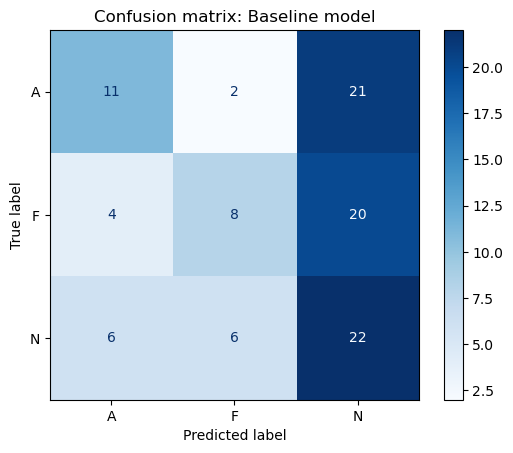

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(week_data_full["annotated_stance"], week_data_full["baseline_stance"])

# Display it with labels and color
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["A", "F", "N"])
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' for integer formatting

plt.title("Confusion matrix: Baseline model")
plt.show()

In [18]:
confusion_matrix(week_data_full["annotated_stance"], week_data_full["baseline_stance"])

array([[11,  2, 21],
       [ 4,  8, 20],
       [ 6,  6, 22]])